In [1]:
from faker import Faker
import numpy as np
import pandas as pd
from faker_credit_score import CreditScore
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [2]:
f = Faker('id_ID')
Faker.seed(30)
f.add_provider(CreditScore)

Pembuatan Data Dummy Menggunakan Faker

In [3]:
#Pembuatan data personal information
nama = []
umur = []
jenis_kelamin = []
status_perkawinan = []
pekerjaan = []

list_pekerjaan = ['Pegawai Negeri Sipil', 'Guru', 'Dokter', 'Perawat', 'Akuntan', 'Pengacara', 
                   'Insinyur', 'Arsitek', 'IT', 'Konsultan', 'Pengusaha', 'Wiraswasta', 'Buruh', 
                   'Tukang Ojek', 'Tukang Bangunan', 'Tukang Cukur', 'Tukang Sapu', 'Penjual Gorengan',
                   'Petani', 'Nelayan', 'Ibu Rumah Tangga', 'Pensiunan', 'Pelajar', 'Mahasiswa', 'Tidak Bekerja',
                    'Pegawai Swasta', 'Lainnya']
for i in range(1000):
    nama.append(f.name())
    umur.append(f.random_int(min = 21, max = 65))
    jenis_kelamin.append(f.random_element(elements=('Laki-laki', 'Perempuan')))
    status_perkawinan.append(f.random_element(elements=('Belum menikah', 'Menikah', 'Cerai')))
    pekerjaan.append(f.random_element(elements=list_pekerjaan))

personal_information = pd.DataFrame({'nama':nama, 'umur':umur,
                                     'jenis_kelamin':jenis_kelamin,
                                     'status_perkawinan':status_perkawinan,
                                     'pekerjaan':pekerjaan})

personal_information.head()

,nama,umur,jenis_kelamin,status_perkawinan,pekerjaan
0,KH. Elvin Suryatmi,22,Laki-laki,Menikah,Guru
1,Keisha Yuniar,29,Laki-laki,Menikah,Pegawai Negeri Sipil
2,Sutan Akarsana Hidayanto,31,Perempuan,Cerai,Wiraswasta
3,R. Himawan Dongoran,36,Perempuan,Menikah,Petani
4,Mursita Setiawan,61,Laki-laki,Cerai,Tukang Cukur


In [23]:
personal_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nama               1000 non-null   object
 1   umur               1000 non-null   int64 
 2   jenis_kelamin      1000 non-null   object
 3   status_perkawinan  1000 non-null   object
 4   pekerjaan          1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [25]:
f.credit_score_name()

'FICO Score 10'

In [27]:
f.credit_score_provider()

'TransUnion'

In [4]:
#pembuatan data credit history
credit_score = []
credit_ultilization = []
number_credit_account =[]
payment_history = []
bankruptcies = []
delinquencies = []
for i in range(1000):
    credit_score.append(f.credit_score())
    credit_ultilization.append(f.pyfloat(min_value=0, max_value=1, right_digits= 2))
    number_credit_account.append(f.random_int(min = 1, max = 5))
    payment_history.append(f.random_element(elements=('Poor','Fair',  'Good', 'Excellent')))
    bankruptcies.append(f.random_int(0,3))
    delinquencies.append(f.random_int(0,5))

credit_history = pd.DataFrame({'credit_score':credit_score,
                              'credit_ultilization': credit_ultilization,
                              'number_credit_account':number_credit_account,
                              'bankruptcies':bankruptcies,
                              'delinquencies':delinquencies,
                              'payment_history':payment_history})

credit_history.head()

,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history
0,695,0.25,1,2,0,Excellent
1,621,0.15,3,0,0,Fair
2,833,0.39,3,3,5,Good
3,539,0.59,5,1,1,Good
4,808,0.53,2,3,3,Fair


In [28]:
credit_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit_score           1000 non-null   int64  
 1   credit_ultilization    1000 non-null   float64
 2   number_credit_account  1000 non-null   int64  
 3   bankruptcies           1000 non-null   int64  
 4   delinquencies          1000 non-null   int64  
 5   payment_history        1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [5]:
#Pembuatan dummy data financial information
income = []
employment_status = []
month_expenses = []
debt_to_income_ratio = []

pekerjaan_dict = {
'Pegawai Negeri Sipil': 'Employed',
'Guru': 'Employed',
'Dokter': 'Employed',
'Perawat': 'Employed',
'Akuntan': 'Employed',
'Pengacara': 'Employed',
'Insinyur': 'Employed',
'Arsitek': 'Employed',
'IT': 'Employed',
'Konsultan': 'Employed',
'Pengusaha': 'Self-employed',
'Wiraswasta': 'Self-employed',
'Buruh': 'Employed',
'Tukang Ojek': 'Underemployed',
'Tukang Bangunan': 'Underemployed',
'Tukang Cukur': 'Underemployed',
'Tukang Sapu': 'Underemployed',
'Penjual Gorengan': 'Underemployed',
'Petani': 'Seasonal workers',
'Nelayan': 'Seasonal workers',
'Ibu Rumah Tangga': 'Not in the labor force',
'Pensiunan': 'Not in the labor force',
'Pelajar': 'Not in the labor force',
'Mahasiswa': 'Not in the labor force',
'Tidak Bekerja': 'Not in the labor force',
'Pegawai Swasta': 'Employed',
'Lainnya': 'Casual or temporary workers'}

for x in pekerjaan:
    employment_status.append(pekerjaan_dict[x])

for i in range(1000):
    income.append(f.pyint(min_value=1000000, max_value= 54000000,step= 100000))
    month_expenses.append(f.pyint(min_value=430000, max_value= 23000000,step= 10000))
    debt_to_income_ratio.append(f.pyfloat(min_value=0, max_value=1, right_digits= 2))



financial_information = pd.DataFrame({'income':income,'employment_status':employment_status,
                                      'month_expenses':month_expenses,'debt_to_income_ratio':debt_to_income_ratio,
                                      })
financial_information.head()

,income,employment_status,month_expenses,debt_to_income_ratio
0,37700000,Employed,480000,0.00
1,22800000,Employed,2110000,0.29
2,15600000,Self-employed,5550000,0.50
3,1900000,Seasonal workers,18100000,0.43
4,24300000,Underemployed,17980000,0.28


In [6]:
#Pembuatan dummy data loan details
loan_amount = []
loan_type = []
loan_purpose = []
repayment_term = []
interest_rate = []
collateral_offer = []
loan_amount_range = []

#dictionary dari interest_rate
interest_rate_dict = {'Pinjaman Pribadi': [0.1, 0.12, 0.15, 0.18],
                      'Pinjaman Bisnis': [0.09, 0.11, 0.13, 0.16],
                      'Pinjaman Pendidikan': [0.1, 0.11, 0.12, 0.13]}

for i in range(1000):
    loan_amount.append(f.pyint(min_value=1000000, max_value= 54000000,step= 100000))
    loan_type.append(f.random_element(elements=['Pinjaman Pribadi', 'Pinjaman Bisnis', 'Pinjaman Pendidikan']))
    loan_purpose.append(f.random_element(elements=['Renovasi Rumah', 'Modal Usaha', 'Kendaraan', 
                                                   'Pendidikan', 'Travel', 'Konsolidasi Utang', 
                                                   'Kesehatan', 'Pernikahan', 'Haji / Umroh', 'Lainnya']))
    repayment_term.append(f.random_element(elements=['12', '24', '36', '48', '60']))
    interest_rate_index = f.pyint(0,3)
    interest_rate.append(interest_rate_dict[loan_type[-1]][interest_rate_index])


#make iteration for loan amount range
for x in loan_amount:
    if x <= 11000000:
        loan_amount_range.append('1000000 to 11000000')
    elif x <= 21000000:
        loan_amount_range.append('11000000 to 21000000')
    elif x <= 31000000:
        loan_amount_range.append('21000000 to 31000000')
    elif x <= 41000000:
        loan_amount_range.append('31000000 to 41000000')
    elif x <= 55000000:
        loan_amount_range.append('51000000 to 55000000')

loan_details = pd.DataFrame({'loan_amount': loan_amount,'loan_type': loan_type,
                            'loan_purpose': loan_purpose,'repayment_term (in month)': repayment_term,
                            'interest_rate': interest_rate, 'loan_amount (in range)' : loan_amount_range})

loan_details['repayment_term (in month)'] = loan_details['repayment_term (in month)'].astype(int)
loan_details.head()

,loan_amount,loan_type,loan_purpose,repayment_term (in month),interest_rate,loan_amount (in range)
0,42300000,Pinjaman Pendidikan,Konsolidasi Utang,24,0.12,51000000 to 55000000
1,47600000,Pinjaman Pribadi,Pernikahan,12,0.12,51000000 to 55000000
2,45500000,Pinjaman Pendidikan,Haji / Umroh,24,0.11,51000000 to 55000000
3,8600000,Pinjaman Pribadi,Konsolidasi Utang,12,0.15,1000000 to 11000000
4,39700000,Pinjaman Bisnis,Konsolidasi Utang,24,0.09,31000000 to 41000000


In [7]:
#pembuatan dummy data other factor
education_level = []
geographic_location = []
employment_history = []
spending_saving_habit = []

for i in range(1000):
    education_level.append(f.random_element(elements=['SMA', 'D1', 'D2', 'D3', 'S1', 'S2']))
    geographic_location.append(f.city())
    employment_history.append(f.random_element(elements=['Fresh graduate', '1-3 years experience', '3-5 years experience', '5+ years experience']))
    spending_saving_habit.append(f.random_element(elements=['Saver', 'Moderate spender', 'Big spender']))

other_factors = pd.DataFrame({'education_level': education_level,
                              'geographic_location': geographic_location,
                              'employment_history': employment_history,
                              'spending_saving_habit': spending_saving_habit})

other_factors.head()


,education_level,geographic_location,employment_history,spending_saving_habit
0,SMA,Ambon,3-5 years experience,Big spender
1,D2,Lubuklinggau,1-3 years experience,Moderate spender
2,D2,Tidore Kepulauan,3-5 years experience,Moderate spender
3,D1,Madiun,1-3 years experience,Moderate spender
4,S1,Payakumbuh,Fresh graduate,Moderate spender


In [8]:
#menggabungkan semua dataframe menjadi satu
dummy_data = pd.concat([personal_information,
                        other_factors,
                        credit_history,
                        financial_information,
                        loan_details],axis=1)
dummy_data.head()

,nama,umur,jenis_kelamin,status_perkawinan,pekerjaan,education_level,geographic_location,employment_history,spending_saving_habit,credit_score,...,income,employment_status,month_expenses,debt_to_income_ratio,loan_amount,loan_type,loan_purpose,repayment_term (in month),interest_rate,loan_amount (in range)
0,KH. Elvin Suryatmi,22,Laki-laki,Menikah,Guru,SMA,Ambon,3-5 years experience,Big spender,695,...,37700000,Employed,480000,0.00,42300000,Pinjaman Pendidikan,Konsolidasi Utang,24,0.12,51000000 to 55000000
1,Keisha Yuniar,29,Laki-laki,Menikah,Pegawai Negeri Sipil,D2,Lubuklinggau,1-3 years experience,Moderate spender,621,...,22800000,Employed,2110000,0.29,47600000,Pinjaman Pribadi,Pernikahan,12,0.12,51000000 to 55000000
2,Sutan Akarsana Hidayanto,31,Perempuan,Cerai,Wiraswasta,D2,Tidore Kepulauan,3-5 years experience,Moderate spender,833,...,15600000,Self-employed,5550000,0.50,45500000,Pinjaman Pendidikan,Haji / Umroh,24,0.11,51000000 to 55000000
3,R. Himawan Dongoran,36,Perempuan,Menikah,Petani,D1,Madiun,1-3 years experience,Moderate spender,539,...,1900000,Seasonal workers,18100000,0.43,8600000,Pinjaman Pribadi,Konsolidasi Utang,12,0.15,1000000 to 11000000
4,Mursita Setiawan,61,Laki-laki,Cerai,Tukang Cukur,S1,Payakumbuh,Fresh graduate,Moderate spender,808,...,24300000,Underemployed,17980000,0.28,39700000,Pinjaman Bisnis,Konsolidasi Utang,24,0.09,31000000 to 41000000


In [9]:
dummy_data.columns

Index(['nama', 'umur', 'jenis_kelamin', 'status_perkawinan', 'pekerjaan',
       'education_level', 'geographic_location', 'employment_history',
       'spending_saving_habit', 'credit_score', 'credit_ultilization',
       'number_credit_account', 'bankruptcies', 'delinquencies',
       'payment_history', 'income', 'employment_status', 'month_expenses',
       'debt_to_income_ratio', 'loan_amount', 'loan_type', 'loan_purpose',
       'repayment_term (in month)', 'interest_rate', 'loan_amount (in range)'],
      dtype='object')

In [10]:
dummy_data['loan_amount']

0      42300000
1      47600000
2      45500000
3       8600000
4      39700000
         ...   
995     7700000
996     7400000
997    52400000
998    21800000
999    15000000
Name: loan_amount, Length: 1000, dtype: int64

In [11]:
#dummy_data.to_csv('credit needed.csv', index= False)

Melakukan eksplorasi data

In [12]:
dummy_data.describe()

,umur,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,income,month_expenses,debt_to_income_ratio,loan_amount,repayment_term (in month),interest_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.914000,577.780000,0.535500,3.013000,1.494000,2.572000,2.768960e+07,1.159127e+07,0.517570,2.775390e+07,36.276000,0.123400
std,12.880315,152.779839,0.266467,1.418042,1.129265,1.725629,1.536214e+07,6.422074e+06,0.258636,1.499047e+07,16.490111,0.025217
min,21.000000,301.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,4.300000e+05,0.000000,1.100000e+06,12.000000,0.090000
25%,32.000000,444.000000,0.300000,2.000000,0.000000,1.000000,1.427500e+07,5.927500e+06,0.300000,1.577500e+07,24.000000,0.100000
50%,43.000000,579.000000,0.520000,3.000000,1.500000,3.000000,2.765000e+07,1.181000e+07,0.510000,2.765000e+07,36.000000,0.120000
75%,54.000000,712.000000,0.770000,4.000000,3.000000,4.000000,4.132500e+07,1.709000e+07,0.730000,3.932500e+07,48.000000,0.130000
max,65.000000,849.000000,0.990000,5.000000,3.000000,5.000000,5.400000e+07,2.298000e+07,0.990000,5.400000e+07,60.000000,0.180000


In [13]:
dummy_data['education_level'].value_counts()

SMA    191
D1     181
D2     171
D3     161
S1     158
S2     138
Name: education_level, dtype: int64

In [14]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nama                       1000 non-null   object 
 1   umur                       1000 non-null   int64  
 2   jenis_kelamin              1000 non-null   object 
 3   status_perkawinan          1000 non-null   object 
 4   pekerjaan                  1000 non-null   object 
 5   education_level            1000 non-null   object 
 6   geographic_location        1000 non-null   object 
 7   employment_history         1000 non-null   object 
 8   spending_saving_habit      1000 non-null   object 
 9   credit_score               1000 non-null   int64  
 10  credit_ultilization        1000 non-null   float64
 11  number_credit_account      1000 non-null   int64  
 12  bankruptcies               1000 non-null   int64  
 13  delinquencies              1000 non-null   int64 

In [15]:
dummy_data[(dummy_data['pekerjaan'] == 'Tidak Bekerja') & (dummy_data['employment_status'] != 'Not in the labor force')]

,nama,umur,jenis_kelamin,status_perkawinan,pekerjaan,education_level,geographic_location,employment_history,spending_saving_habit,credit_score,...,income,employment_status,month_expenses,debt_to_income_ratio,loan_amount,loan_type,loan_purpose,repayment_term (in month),interest_rate,loan_amount (in range)


In [16]:
#Calculate the IQR for each feature
#q1 = dummy_data.quantile(0.25)
#q3 = dummy_data.quantile(0.75)
#iqr = q3 - q1
#Identify potential outliers
#outliers = (dummy_data < (q1 - 1.5 * iqr)) | (dummy_data > (q3 + 1.5 * iqr))
#dummy_data = dummy_data[~np.any(outliers, axis=1)]
#display(dummy_data.info())


<AxesSubplot:xlabel='credit_score', ylabel='loan_amount'>

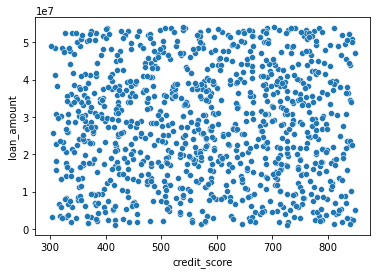

In [17]:
sns.scatterplot(data =dummy_data, x='credit_score', y = 'loan_amount')

<AxesSubplot:xlabel='education_level', ylabel='loan_amount'>

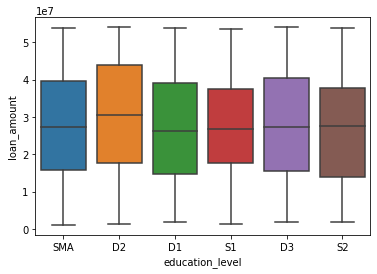

In [18]:
sns.boxplot(data = dummy_data, x = 'education_level', y = 'loan_amount')

<AxesSubplot:>

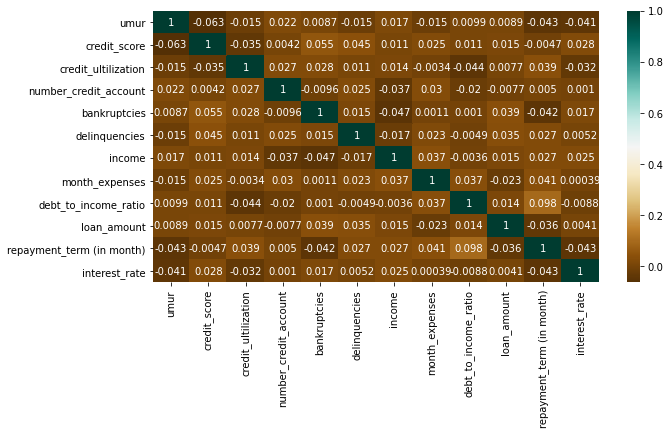

In [19]:
plt.figure(figsize=(10,5))
corr = dummy_data.corr()
sns.heatmap(corr, cmap="BrBG",annot=True)

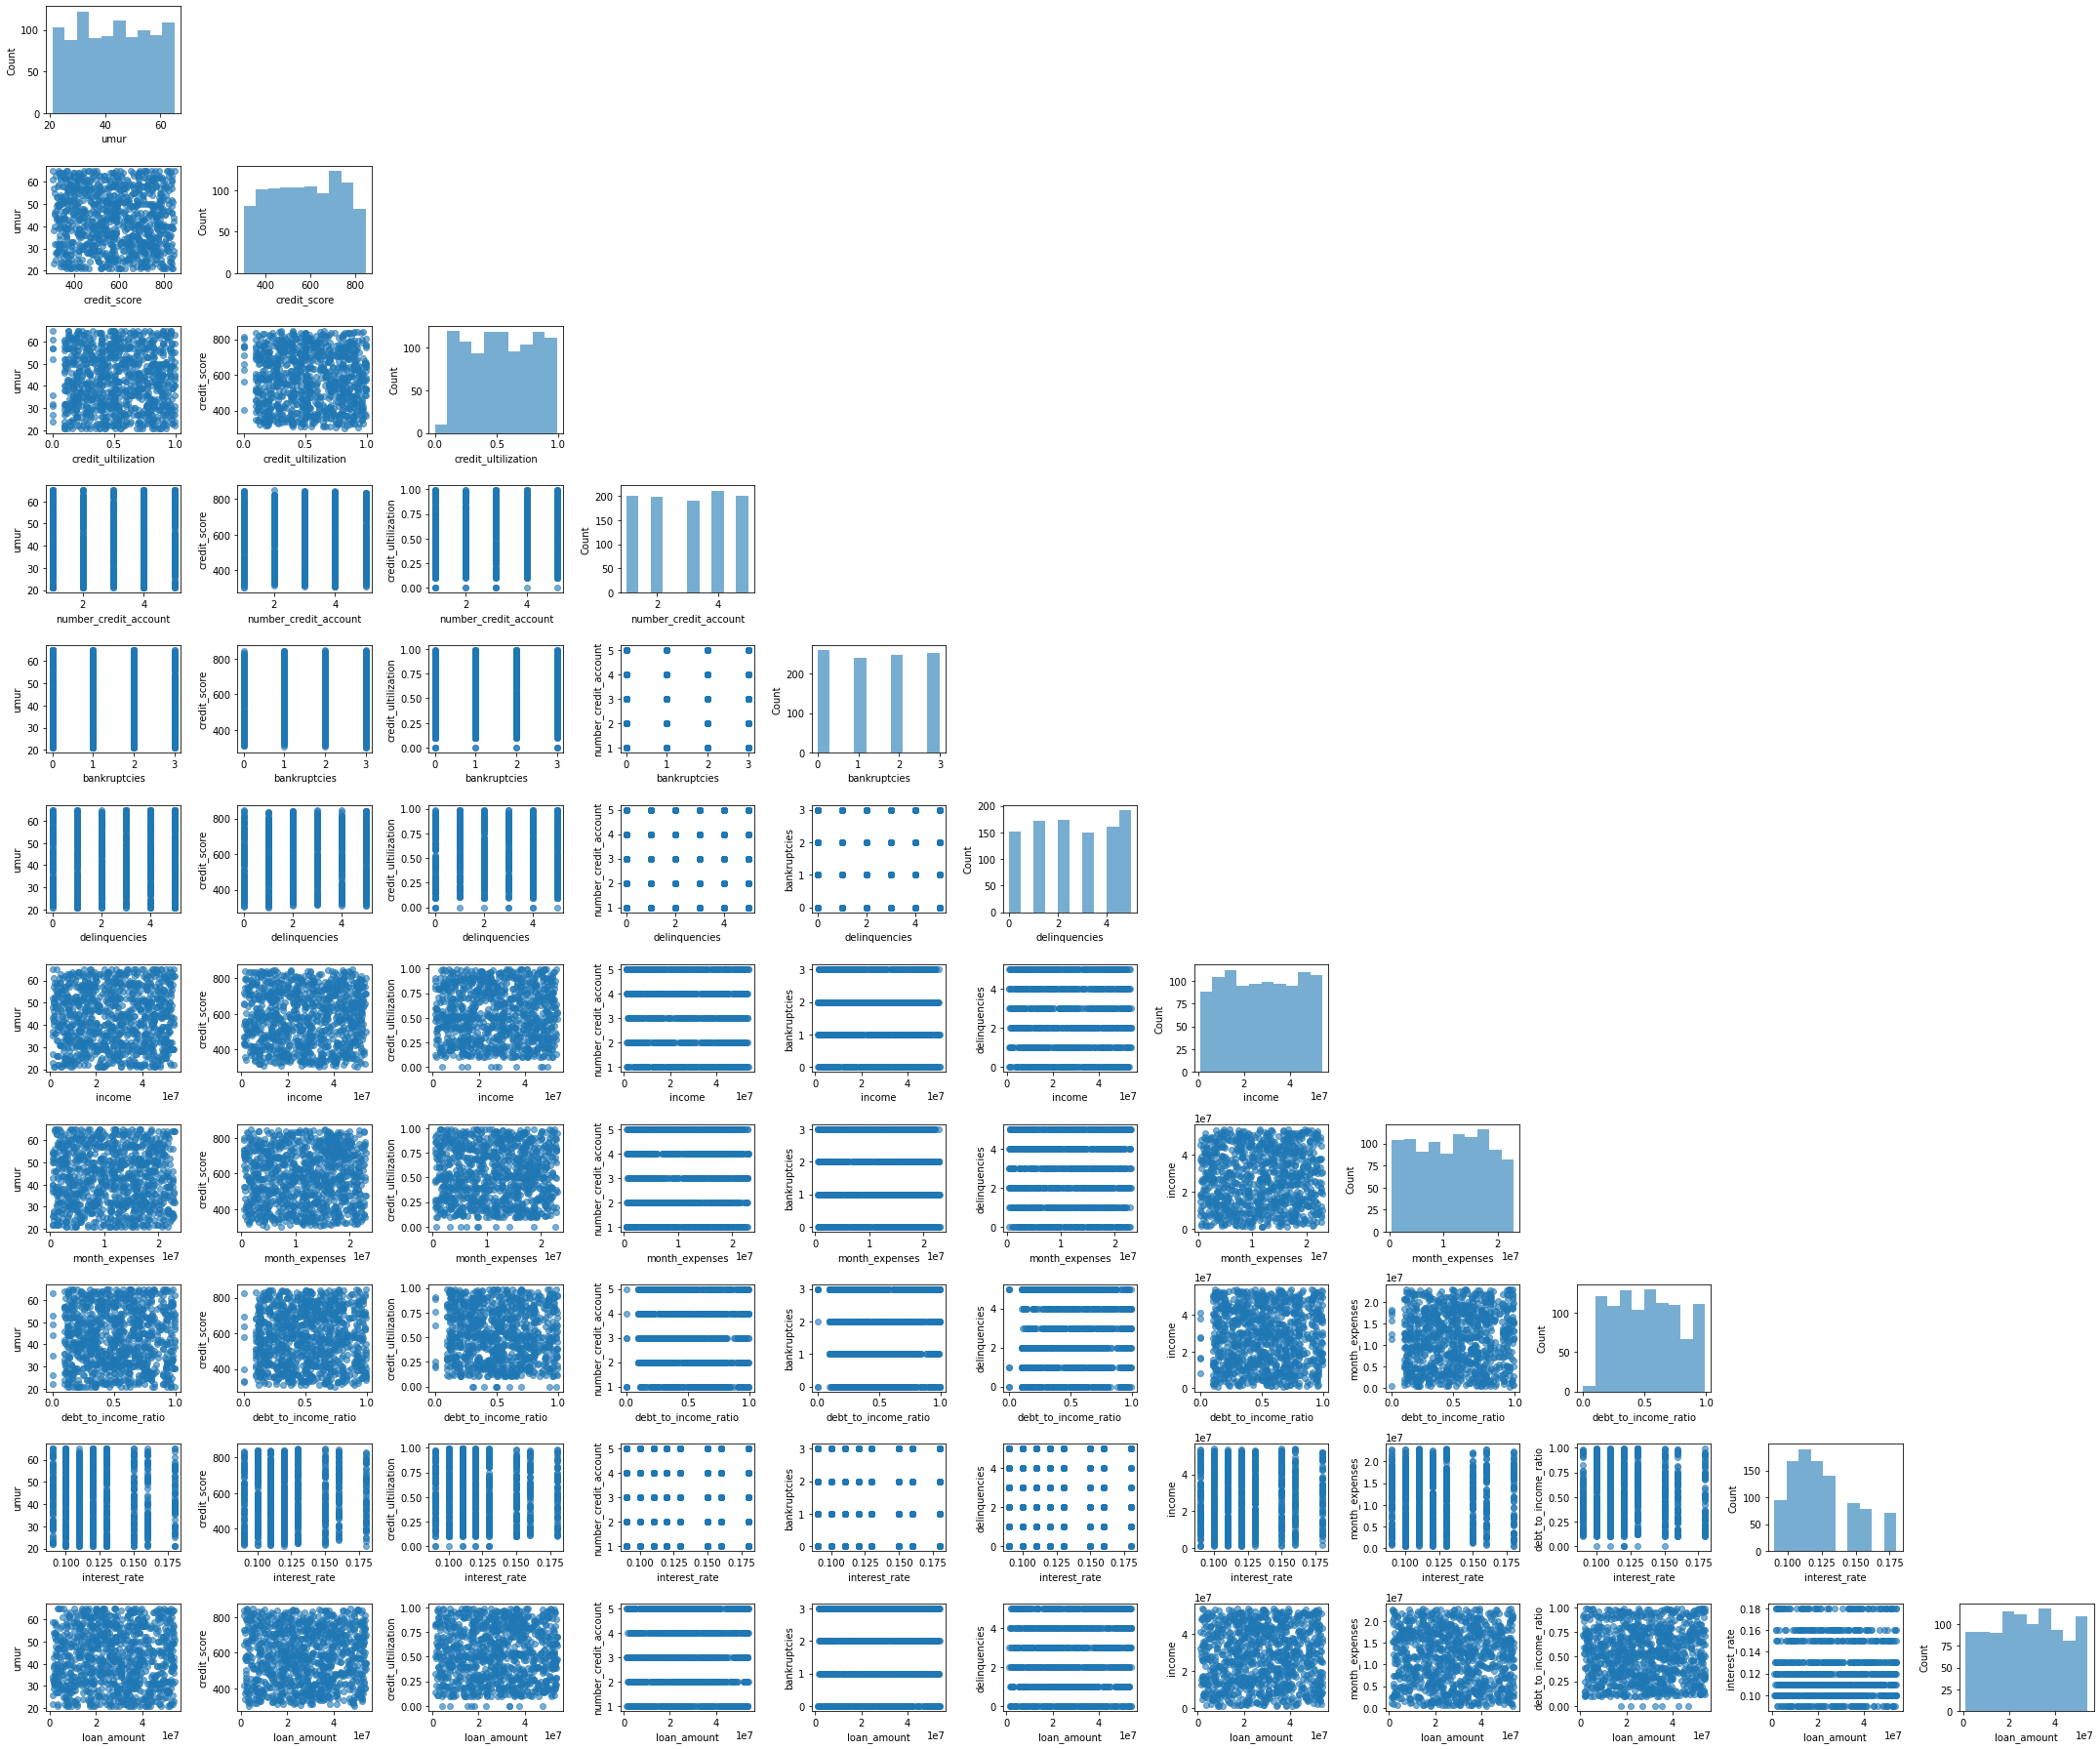

In [29]:
cols_scatterplot = ['umur', 'credit_score', 'credit_ultilization', 
                    'number_credit_account','bankruptcies', 
                    'delinquencies', 'income', 'month_expenses',
                    'debt_to_income_ratio', 'interest_rate', 'loan_amount']
scatterplotmatrix(dummy_data[cols_scatterplot].values,
                  figsize=(30,25), names = cols_scatterplot,
                  alpha = 0.6)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'number_credit_account vs credit loan_amount')

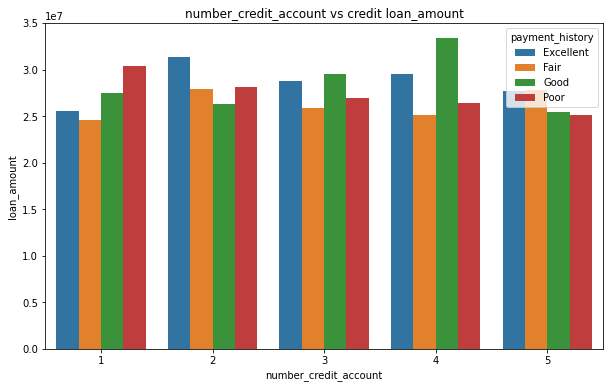

In [ ]:
plt.figure(figsize=(10,6))

groupby_1 = dummy_data.groupby(['number_credit_account','payment_history'],as_index= False)['loan_amount'].mean()

sns.barplot(data =groupby_1, x = 'number_credit_account', y = 'loan_amount',hue= 'payment_history')
plt.title('number_credit_account vs credit loan_amount')

Membangun Model Regresi

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

In [ ]:
#Menghilangkan data yang tidak digunakan
dummy_data.drop(columns=['nama'], axis= 1, inplace= True)

In [ ]:
dummy_data[['loan_amount','loan_amount (in range)']].head()

,loan_amount,loan_amount (in range)
0,42300000,51000000 to 55000000
1,47600000,51000000 to 55000000
2,45500000,51000000 to 55000000
3,8600000,1000000 to 11000000
4,39700000,31000000 to 41000000


In [ ]:
#split dataset for the predictor purposes ()
dummy_data_1 = dummy_data.drop(columns = 'loan_amount (in range)', axis= 1)
dummy_data_2 = dummy_data.drop(columns = 'loan_amount', axis= 1)

In [ ]:
#Encode data kategori 
display(dummy_data_1[:2])

#encode non-ordinal kategori
df_encode =pd.get_dummies(dummy_data_1, columns=['jenis_kelamin','status_perkawinan','pekerjaan',
                                               'geographic_location','employment_status',
                                               'loan_type', 'loan_purpose'])
display(df_encode[:1])

#encode ordinal kategori pada prediktor loan amount
list_columns_ordinal =['education_level','employment_history',
                       'spending_saving_habit','payment_history']

list_education = ['SMA', 'D1', 'D2', 'D3', 'S1', 'S2']
list_employment_hist = ['Fresh graduate', '1-3 years experience', '3-5 years experience', '5+ years experience']
list_spending_saving_habit = ['Saver', 'Moderate spender', 'Big spender']
list_payment_history = ['Poor','Fair',  'Good', 'Excellent']
list_loan_amount = ['1000000 to 11000000',  '11000000 to 21000000',  '21000000 to 31000000',  '31000000 to 41000000',  '41000000 to 51000000',  '51000000 to 55000000']

enc = OrdinalEncoder(categories=[list_education,list_employment_hist,
                                 list_spending_saving_habit, list_payment_history])
df_encode[list_columns_ordinal] = enc.fit_transform(df_encode[list_columns_ordinal])

df_encode[:1]

,umur,jenis_kelamin,status_perkawinan,pekerjaan,education_level,geographic_location,employment_history,spending_saving_habit,credit_score,credit_ultilization,...,payment_history,income,employment_status,month_expenses,debt_to_income_ratio,loan_amount,loan_type,loan_purpose,repayment_term (in month),interest_rate
0,22,Laki-laki,Menikah,Guru,SMA,Ambon,3-5 years experience,Big spender,695,0.25,...,Excellent,37700000,Employed,480000,0.00,42300000,Pinjaman Pendidikan,Konsolidasi Utang,24,0.12
1,29,Laki-laki,Menikah,Pegawai Negeri Sipil,D2,Lubuklinggau,1-3 years experience,Moderate spender,621,0.15,...,Fair,22800000,Employed,2110000,0.29,47600000,Pinjaman Pribadi,Pernikahan,12,0.12


,umur,education_level,employment_history,spending_saving_habit,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history,...,loan_purpose_Haji / Umroh,loan_purpose_Kendaraan,loan_purpose_Kesehatan,loan_purpose_Konsolidasi Utang,loan_purpose_Lainnya,loan_purpose_Modal Usaha,loan_purpose_Pendidikan,loan_purpose_Pernikahan,loan_purpose_Renovasi Rumah,loan_purpose_Travel
0,22,SMA,3-5 years experience,Big spender,695,0.25,1,2,0,Excellent,...,0,0,0,1,0,0,0,0,0,0


,umur,education_level,employment_history,spending_saving_habit,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history,...,loan_purpose_Haji / Umroh,loan_purpose_Kendaraan,loan_purpose_Kesehatan,loan_purpose_Konsolidasi Utang,loan_purpose_Lainnya,loan_purpose_Modal Usaha,loan_purpose_Pendidikan,loan_purpose_Pernikahan,loan_purpose_Renovasi Rumah,loan_purpose_Travel
0,22,0.0,2.0,2.0,695,0.25,1,2,0,3.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encode.describe()

,umur,education_level,employment_history,spending_saving_habit,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history,...,loan_purpose_Haji / Umroh,loan_purpose_Kendaraan,loan_purpose_Kesehatan,loan_purpose_Konsolidasi Utang,loan_purpose_Lainnya,loan_purpose_Modal Usaha,loan_purpose_Pendidikan,loan_purpose_Pernikahan,loan_purpose_Renovasi Rumah,loan_purpose_Travel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.00000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.914000,2.328000,1.509000,1.018000,577.780000,0.535500,3.013000,1.494000,2.572000,1.49900,...,0.099000,0.099000,0.11400,0.10100,0.1020,0.098000,0.113000,0.091000,0.088000,0.095000
std,12.880315,1.695668,1.125694,0.816298,152.779839,0.266467,1.418042,1.129265,1.725629,1.11411,...,0.298811,0.298811,0.31797,0.30148,0.3028,0.297463,0.316751,0.287753,0.283437,0.293362
min,21.000000,0.000000,0.000000,0.000000,301.000000,0.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,0.000000,444.000000,0.300000,2.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,2.000000,1.000000,1.000000,579.000000,0.520000,3.000000,1.500000,3.000000,2.00000,...,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,4.000000,3.000000,2.000000,712.000000,0.770000,4.000000,3.000000,4.000000,2.00000,...,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.000000,5.000000,3.000000,2.000000,849.000000,0.990000,5.000000,3.000000,5.000000,3.00000,...,1.000000,1.000000,1.00000,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#split dataset
x = df_encode.drop('loan_amount', axis =1).values
y = df_encode['loan_amount'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
#standarscaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#build MLR model
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Slope: %.2f' %lr.coef_[0])
print('Intercept: %.2f' %lr.intercept_)
#predict the result
loan_prediction_mlr = lr.predict(x_test)
#r2 score
print('r2 score: %.2f'  %r2_score(y_test,loan_prediction_mlr))
#mean square error (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_mlr))


Slope: -8872.53
Intercept: 27642858.90
r2 score: -104537337494306837978152960.00
mean square error: 21172497979027896596104700278667881742336.00


In [ ]:
print(y_test[:1])

[16700000]


In [ ]:
print(loan_prediction_mlr[:1])

[2.99425641e+18]


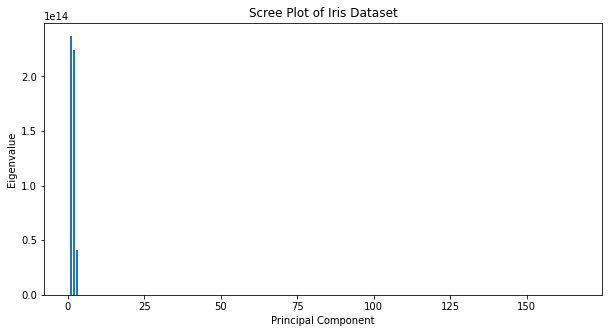

In [ ]:
#Visualization PCA with scree plot
pca_plot = PCA()
pca_plot.fit(df_encode.values)

#Extract the eigenvalues of principal components
eigenvalues = pca_plot.explained_variance_

# Plot the eigenvalues in a scree plot
plt.figure(figsize=(10,5))
plt.bar(np.arange(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Iris Dataset')
plt.show()

In [ ]:
#Use PCA + MLR Models to Predict test data
#Make PCA models
pca  = PCA(n_components= 3)

#Apply pca to training and test data
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

#Train MLR model on PCA
lr_pca = LinearRegression()
lr_pca.fit(x_train_pca,y_train)

#Use Models to Make Prediction on Test Data
loan_prediction_mlr_pca = lr_pca.predict(x_test_pca)

#r2 score Test set
print('r2 score (test set): %.2f' %r2_score(y_test,loan_prediction_mlr_pca))
#Mean square eroor (MSE) Test set
print('mean square error (test set): %.2f' %mean_squared_error(y_test,loan_prediction_mlr_pca))

r2 score (test set): -0.02
mean square error (test set): 207497638596619.84


In [ ]:
#build Lasso Regression model
lasso = Lasso(alpha= 1)
lasso.fit(x_train,y_train)
print('Slope: %.2f' %lasso.coef_[0])
print('Intercept: %.2f' %lasso.intercept_)
#predict the result
loan_prediction_lasso = lasso.predict(x_test)
#r2 score
print('r2 score: %.2f' %r2_score(y_test,loan_prediction_lasso))
#Mean square eroor (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_lasso))

Slope: -8867.51
Intercept: 27599125.00
r2 score: -0.27
mean square error: 256892917165581.75


c:\Users\rafly\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+16, tolerance: 1.839e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Define the hyperparameters to tune
param_grid_Lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                     'tol': [0.0001, 0.001, 0.01], 
                     'max_iter': [1000, 5000, 10000],
                     'selection': ['cyclic', 'random']}

#Create a Lasso regression object
lasso_2 = Lasso()

#Create a grid search object
gs_lasso = GridSearchCV(lasso_2, param_grid = param_grid_Lasso,
                        cv = 5, scoring= 'r2')

#Fit the GridSearchCV object to the data
gs_lasso.fit(x_train, y_train)

#Print the best hyperparameters and the corresponding R2 score
print("Best parameters: ", gs_lasso.best_params_)
print("Best R2 score: ", gs_lasso.best_score_)

#Use the best model to make predictions on the test set
best_model_lasso = gs_lasso.best_estimator_
loan_prediction_lasso = best_model_lasso.predict(x_test)

#r2 score Test set
print('r2 score (test set): %.2f' %r2_score(y_test,loan_prediction_lasso))
#Mean square error (MSE) Test set
print('mean square error (test set): %.2f' %mean_squared_error(y_test,loan_prediction_lasso))
 

c:\Users\rafly\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.416e+15, tolerance: 1.502e+13
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+16, tolerance: 1.498e+13
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.791e+15, toleranc

Best parameters:  {'alpha': 100, 'max_iter': 5000, 'selection': 'random', 'tol': 0.0001}
Best R2 score:  -0.24825490737332276
r2 score (test set): -0.27
mean square error (test set): 257571539108153.53


c:\Users\rafly\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.692e+15, tolerance: 1.839e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#build Ridge Regression model
ridge = Ridge(alpha= 1)
ridge.fit(x_train,y_train)
print('Slope: %.2f' %ridge.coef_[0])
print('Intercept: %.2f' %ridge.intercept_)
#predict the result
loan_prediction_ridge = ridge.predict(x_test)
#r2 score
print('r2 score: %.2f' %r2_score(y_test,loan_prediction_ridge))
#Mean square eroor (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_ridge))

Slope: -8193.58
Intercept: 27599125.00
r2 score: -0.27
mean square error: 257232704144366.00


In [ ]:
#build ElasticNet Regression
enet = ElasticNet(alpha= 1, l1_ratio = 0.01)
enet.fit(x_train, y_train)
print('Slope: %.2f' %enet.coef_[0])
print('Intercept: %.2f' %enet.intercept_)
#predict the result
loan_prediction_enet = enet.predict(x_test)
#r2 score
print('r2 score: %.2f' %r2_score(y_test,loan_prediction_enet))
#Mean square eroor (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_enet))

Slope: 99817.38
Intercept: 27599125.00
r2 score: -0.09
mean square error: 220737371223140.25


In [ ]:
#build XGboost Regressor model
xg_reg = XGBRegressor()
xg_reg.fit(x_train,y_train)
#predict the result
loan_prediction_xg = xg_reg.predict(x_test)
#r2 score
print('r2 score: %.2f' %r2_score(y_test,loan_prediction_xg))
#Mean square eroor (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_xg))


r2 score: -0.32
mean square error: 266682272976340.97


In [ ]:
xg = XGBRegressor()
xg_score_r2 = cross_val_score(xg, x,y,
                           scoring = 'r2',
                           cv = 5)
xg_score_mse = cross_val_score(xg, x,y,
                               scoring = 'neg_mean_squared_error',
                               cv = 5)
#r2 score
print('r2 score: %.2f' %np.mean(xg_score_r2))
#Mean square eroor (MSE)
print('mean square error: %.2f' %np.mean(-xg_score_mse))


r2 score: -0.30
mean square error: 290495848255403.12


In [ ]:
#build Random Forest Regression model
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(x_train,y_train)
#predict the result
loan_prediction_rf = rf.predict(x_test)
#r2 score
print('r2 score: %.2f' %r2_score(y_test,loan_prediction_rf))
#Mean square eroor (MSE)
print('mean square error: %.2f' %mean_squared_error(y_test,loan_prediction_rf))

r2 score: -0.06
mean square error: 213899083245000.00


In [ ]:
#make grid parameter for random forest
param_grid_rf = {'max_depth': [5, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['sqrt', 'log2', None]}
rf_2 = RandomForestRegressor()
gs_rf = GridSearchCV(rf_2, param_grid= param_grid_rf,
                     cv = 5, scoring= 'r2')

#Fit the GridSearchCV object to the data
gs_rf.fit(x_train,y_train)

#Print the best hyperparameters and the corresponding R2 score
print("Best parameters: ", gs_rf.best_params_)
print("Best R2 score: ", gs_rf.best_score_)

#Use the best model to make predictions on the test set
best_model_rf = gs_rf.best_estimator_
loan_prediction_rf_2 = best_model_rf.predict(x_test)

#r2 score Test set
print('r2 score (test set): %.2f' %r2_score(y_test,loan_prediction_rf_2))
#Mean square error (MSE) Test set
print('mean square error (test set): %.2f' %mean_squared_error(y_test,loan_prediction_rf_2))


Best parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best R2 score:  -0.006134399114105604
r2 score (test set): -0.02
mean square error (test set): 207418542858269.88


In [ ]:
#use pca for random forest regression
gs_rf.fit(x_train_pca,y_train)
print("Best parameters: ", gs_rf.best_params_)
print("Best R2 score: ", gs_rf.best_score_)
#Use the best model to make predictions on the test set
gs_rf_pca = gs_rf.best_estimator_
loan_prediction_rf_3 = gs_rf_pca.predict(x_test_pca)
#r2 score Test set
print('r2 score (test set): %.2f' %r2_score(y_test,loan_prediction_rf_3))
#Mean square error (MSE) Test set
print('mean square error (test set): %.2f' %mean_squared_error(y_test,loan_prediction_rf_3))


Best parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best R2 score:  -0.021131483339249812
r2 score (test set): -0.02
mean square error (test set): 207131559123224.09


In [ ]:
#Make grid parameter for MLP Regressor
param_grid_mlp = {'hidden_layer_sizes': [(10,), (20,), (10, 10), (20, 20)],
                  'activation': ['relu', 'tanh'],
                  'solver': ['adam', 'sgd'],
                  'max_iter': [100]}
mlp = MLPRegressor(random_state= 1)
gs_mlp = GridSearchCV(mlp, param_grid= param_grid_mlp,
                      cv = 5,
                      scoring= 'r2')

#Fit the MLP Regressor object to the data
gs_mlp.fit(x_train, y_train)

#Print the best hyperparameters and the corresponding R2 score
print(f'Best hyperparameters: {gs_mlp.best_params_}')
print(f'Training set r2 score: {gs_mlp.best_score_:.2f}')

#Use the best model to make predictions on the test set
best_mlp = gs_mlp.best_estimator_
loan_prediction_mlp = best_mlp.predict(x_test)

#r2 score Test set
print('r2 score (test set): %.2f' %r2_score(y_test,loan_prediction_mlp))
#Mean square eroor (MSE) Test set
print('mean square error (test set): %.2f' %mean_squared_error(y_test,loan_prediction_mlp))


c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Best hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'max_iter': 100, 'solver': 'sgd'}
Training set r2 score: -0.01
r2 score (test set): -0.01
mean square error (test set): 204254005395268.72


c:\Users\rafly\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Make classification model from 'loan_amount (in range)' column in dummy data 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Encode data kategori 
display(dummy_data_2[:1])

#encode non-ordinal kategori
df_encode_2 = pd.get_dummies(dummy_data_2, columns=['jenis_kelamin','status_perkawinan','pekerjaan',
                                                   'geographic_location','employment_status',
                                                   'loan_type', 'loan_purpose'])
display(df_encode_2[:1])


#encode ordinal kategori
list_columns_ordinal_2 =['education_level','employment_history',
                       'spending_saving_habit','payment_history',
                       'loan_amount (in range)']
enc_2 = OrdinalEncoder(categories=[list_education,
                                   list_employment_hist,
                                   list_spending_saving_habit, 
                                   list_payment_history,
                                   list_loan_amount])
df_encode_2[list_columns_ordinal_2] = enc_2.fit_transform(df_encode_2[list_columns_ordinal_2])

df_encode_2[:1]


,umur,jenis_kelamin,status_perkawinan,pekerjaan,education_level,geographic_location,employment_history,spending_saving_habit,credit_score,credit_ultilization,...,payment_history,income,employment_status,month_expenses,debt_to_income_ratio,loan_type,loan_purpose,repayment_term (in month),interest_rate,loan_amount (in range)
0,22,Laki-laki,Menikah,Guru,SMA,Ambon,3-5 years experience,Big spender,695,0.25,...,Excellent,37700000,Employed,480000,0.0,Pinjaman Pendidikan,Konsolidasi Utang,24,0.12,51000000 to 55000000


,umur,education_level,employment_history,spending_saving_habit,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history,...,loan_purpose_Haji / Umroh,loan_purpose_Kendaraan,loan_purpose_Kesehatan,loan_purpose_Konsolidasi Utang,loan_purpose_Lainnya,loan_purpose_Modal Usaha,loan_purpose_Pendidikan,loan_purpose_Pernikahan,loan_purpose_Renovasi Rumah,loan_purpose_Travel
0,22,SMA,3-5 years experience,Big spender,695,0.25,1,2,0,Excellent,...,0,0,0,1,0,0,0,0,0,0


,umur,education_level,employment_history,spending_saving_habit,credit_score,credit_ultilization,number_credit_account,bankruptcies,delinquencies,payment_history,...,loan_purpose_Haji / Umroh,loan_purpose_Kendaraan,loan_purpose_Kesehatan,loan_purpose_Konsolidasi Utang,loan_purpose_Lainnya,loan_purpose_Modal Usaha,loan_purpose_Pendidikan,loan_purpose_Pernikahan,loan_purpose_Renovasi Rumah,loan_purpose_Travel
0,22,0.0,2.0,2.0,695,0.25,1,2,0,3.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
pd.concat([df_encode_2['loan_amount (in range)'], dummy_data_2['loan_amount (in range)']], axis=1).head(6)

,loan_amount (in range),loan_amount (in range)
0,5.0,51000000 to 55000000
1,5.0,51000000 to 55000000
2,5.0,51000000 to 55000000
3,0.0,1000000 to 11000000
4,3.0,31000000 to 41000000
5,5.0,51000000 to 55000000


In [ ]:
#split dataset
x_2 = df_encode_2.drop('loan_amount (in range)', axis= 1).values
y_2 = df_encode_2['loan_amount (in range)'].values
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2, test_size= 0.2, random_state=0)
#standarscaler
x_train_2 = sc.fit_transform(x_train_2)
x_test_2 = sc.fit_transform(x_test_2)

In [ ]:
#Build Logistic Regression
log_r = LogisticRegression()
log_r.fit(x_train_2,y_train_2)
#Predict the result
loan_range_prediction_logr = log_r.predict(x_test_2)
#accuracy score
print('accuracy_score:',accuracy_score(y_test_2, loan_range_prediction_logr))

accuracy_score: 0.175


In [ ]:
#Build Random Forest Classification
rf_c = RandomForestClassifier(random_state= 6)
rf_c.fit(x_train_2,y_train_2)
#Predict the result
loan_range_prediction_rf = rf_c.predict(x_test_2)
#Accuracy Score
print('accuracy_score:',accuracy_score(y_test_2, loan_range_prediction_rf))

accuracy_score: 0.21


In [ ]:
#Build grid search cv on random forest classification model
parameter_rf_c = {'n_estimators': [50, 100, 200],
                  'max_depth': [None, 5, 10],
                  'min_samples_split': [2, 5, 10]}

#Build grid search cv model
gs_rf_c = GridSearchCV(estimator= rf_c,
                       param_grid= parameter_rf_c,
                       cv = 5)

#Fit the model 
gs_rf_c.fit(x_train_2, y_train_2)

#Print the best hyperparameters and the corresponding R2 score
print("Best parameters: ", gs_rf_c.best_params_)

#Predict the test set result
best_model_rf_c = gs_rf_c.best_params_
rf_c_2 = RandomForestClassifier(random_state=5,
                                max_depth = best_model_rf_c['max_depth'],
                                min_samples_split = best_model_rf_c['min_samples_split'],
                                n_estimators = best_model_rf_c['n_estimators'])
rf_c_2.fit(x_train_2,y_train_2)
loan_range_prediction_rf_c = rf_c_2.predict(x_test_2)

#Accuracy Score
print('accuracy_score:',accuracy_score(y_test_2, loan_range_prediction_rf_c))

Best parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
accuracy_score: 0.23


In [ ]:
#Build the model
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
ada_boost.fit(x_train_2, y_train_2)
loan_prediction_ada = ada_boost.predict(x_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_test_2, loan_prediction_ada)))


Accuracy: 0.21


In [ ]:
#gridsearchcv for ada boost model
parameter_ada_boost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

#build gridsearch and the model
ada_boost_2 = AdaBoostClassifier()
gs_ada_boost = GridSearchCV(ada_boost_2,
                            param_grid= parameter_ada_boost,
                            cv = 5)
gs_ada_boost.fit(x_train_2,y_train_2)

#Print the best hyperparameters
print("Best hyperparameters: {}".format(gs_ada_boost.best_params_))
#make prediction on model
best_model_ada = gs_ada_boost.best_estimator_
loan_prediction_ada = best_model_ada.predict(x_test_2)

#Evaluate accuracy of the model
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test_2,loan_prediction_ada)))


Best hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1, 'n_estimators': 150}
Accuracy on test set: 0.165
